In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def drawImg(img,title="Image"):
  plt.imshow(img)
  plt.axis("off")
  plt.title(title+str(img.shape))
  plt.show()

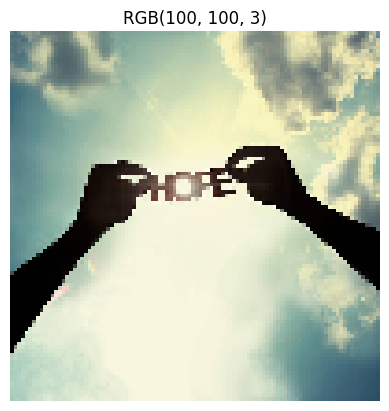

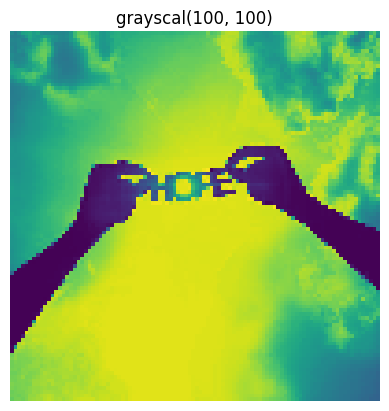

In [3]:
img=cv2.imread("/content/drive/MyDrive/Colab Notebooks/ConvolutionNeuralNetwork/positive.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(100,100))
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
drawImg(img,"RGB")
drawImg(img_gray,"grayscal")

In [4]:
#Hardcoded filter
def ConvolutionNeuralNetwork(img,img_filter):
  w=img.shape[0]
  H=img.shape[1]
  F=img_filter.shape[0]#3
  new_img=np.zeros((w-F+1,H-F+1))

  for row in range (w-F+1):
    for col in range (H-F+1):
      for i in range(F):
        for j in range(F):
          new_img[row][col]+=img[row+i][col+j]*img_filter[i][j]

        if new_img [row][col]>255:
          new_img [row ][col]=255

        elif new_img[row][col]<0:
          new_img[row][col]=0

  return new_img #Activation Map




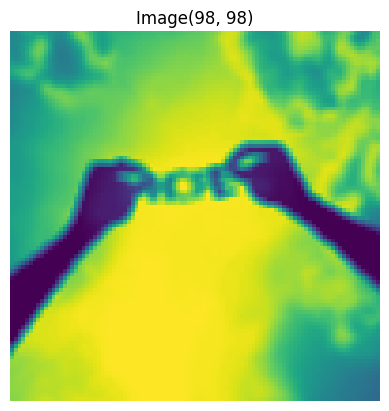

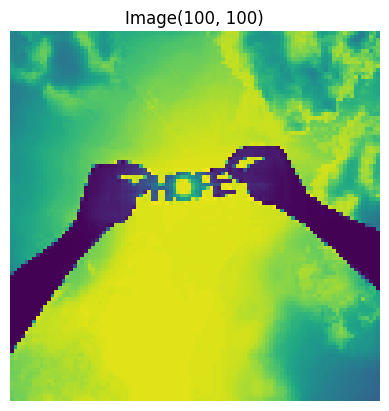

In [5]:
blur_filter=np.ones((3,3))/9.0
# print(blur_filter)
output1=ConvolutionNeuralNetwork(img_gray,blur_filter)
drawImg(output1)
drawImg(img_gray)
#filter bluring our image

In [6]:
img.shape[1]

100

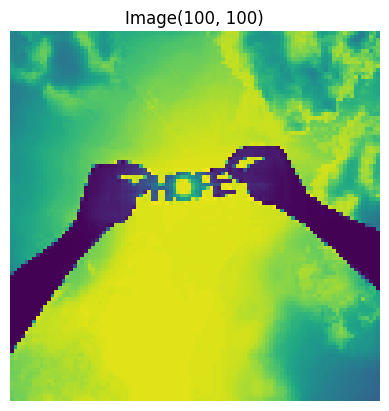

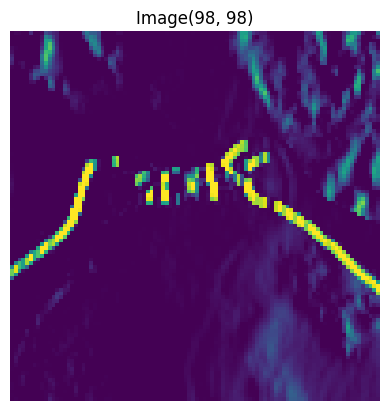

In [7]:
edge_filter=np.array([[1,0,-1],
                      [1,0,-1],
                      [1,0,-1]])
# print(blur_filter)
output2=ConvolutionNeuralNetwork(img_gray,edge_filter)
drawImg(img_gray)
drawImg(output2)
#extracting feature usig filters

Padding

(100, 100, 3)


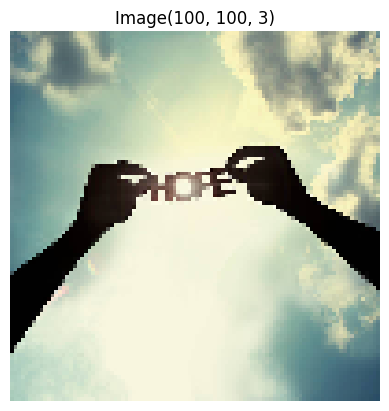

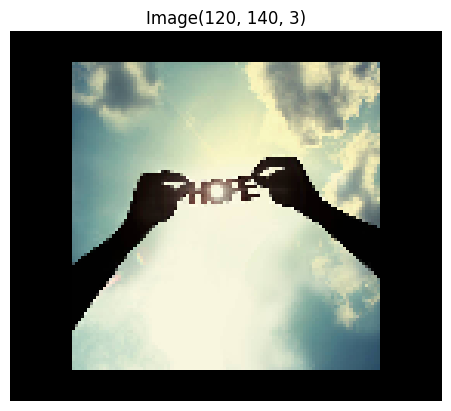

In [8]:
print(img.shape)
drawImg(img)
#padding to this image
pad_img=np.pad(img,((10,10),(20,20),(0,0)),'constant',constant_values=0)#0for black
drawImg(pad_img)

Pooling

In [15]:
#max pooling
X=np.array([[1,0,2,3]
            ,[4,6,6,8],
            [3,1,1,0],
            [1,2,2,4]
            ])
def pooling (X,mode="max"):
  stride=2
  f=2
  H,W=X.shape

  Ho=int((H-f)/stride)+1
  Wo=int((W-f)/stride)+1

  output =np.zeros((Ho,Wo))
  for r in range(Ho):
    for c in range(Wo):
      r_start=r*stride
      r_end=r_start+f
      c_start=c*stride
      c_end=c_start+f
      X_slice=X[r_start:r_end,c_start:c_end]
      if mode=="max":
        output[r][c]=np.max(X_slice)
      else:
        output[r][c]=np.mean(X_slice)
  return output


In [17]:
pooling_output=pooling(X)
print(pooling_output)

[[6. 8.]
 [3. 4.]]
